# Project VI - Solution of Initial Value Problems

---

**Students:** Chloë Geller, Zachary Crandall, Carlos Fuentes, Jessica Quiroz Galvez, Brandon Shelnutt, and Austin Wauters

MAP 4384\
Professor Borges

---

Consider the initial-value-problem:

$$
\begin{align*}
x^{''}(t)+2\gamma x^{'}+\omega^{2} x(t)=0 \\
x(0)=x_0 \\ 
x^{'}(0)=\gamma x_0
\end{align*}
$$

with $0 < \gamma < \omega$. It's solution is given by
$$x(t)=x_0 e^{-\gamma t} \cos(\beta t)$$

where $\beta = \sqrt{\omega^{2}-\gamma^{2}}$. This equation can be written as a first order system, with $x^{'}=y$, and $y^{'}=-2\gamma y - \omega^2 x$.

## Your task

### Explicit Midpoint

Implement the Explicit Midpoint method (EMP) doing
$$\frac{x_{n+1}−x_{n−1}}{2h}=y_n\\
\frac{y_{n+1}−y_{n−1}}{2h}=−2\gamma y_n− \omega^2x_n $$

### Implicit Midpoint

Implement the Implicit Midpoint method (IMP) doing
$$ \frac{x_{n+1}−x_n}{h}=\frac{y_{n+1}+y_n}{2}\\
\frac{y_{n+1}−y_n}{h}=−2\gamma \frac{y_{n+1}+y_n}{2}−\omega^2\frac{x_{n+1}+x_n}{2}$$

### Non-Standard Implicit Midpoint

Implement the Non-standard Implicit Midpoint method (NSIMP) doing
$$\frac{x_{n+1}−e^{−\gamma h}x_n}{h}=\frac{y_{n+1}+e^{−\gamma h}y_n}{2}\\
\frac{y_{n+1}−e^{−\gamma h}y_n}{h}=−\omega^2\frac{x_{n+1}+e^{−\gamma h}x_n}{2}$$

 - All three methods are second order and they do not differ much in terms of computational cost; demonstrate this numerically.  I expect several table with the results.

 - For $\gamma=0$  the  implicit  methods  are  equivalent,  and  we  expect  they  are  superior  to  the explicit method; check this numerically using long time simulations with varioush, $\omega$, $x_0$.

- Experiment on the long-time accuracy of the methods for small values of $\gamma>0$.

- Run experiments to help you fully understand what happens to the approximations as $\gamma$ increases.

- If there is, in fact, a ’breaking point’ for any method as $\gamma$ increases determine what it is and how it depends upon $h$ or $\omega$.

## Introduction

For this computer project, we will be utilizing the concept of Euler’s method to approximate the solution to the given initial value problem for a second order differential equation. The general concept of Euler’s method is to generate an iterated list of points that would be approximately close to the exact solution to the differential equation. The solution to a differential equation is a function that satisfies the equation. The idea for solving higher order differential equations using Euler’s method is to convert the given second order system into two first order equations. 

In addition, Euler’s method involves picking a step size for each point we generate when computing approximations points. With this in mind, we can introduce the concept of Midpoint Methods. These methods use slope estimates at the midpoint interval. These methods will be implemented into Euler’s method to improve our generated iterated list of points with each midpoint method.

## Midpoint Methods

For this project, we will be given two general initial conditions that the solution curve must go through. We are given three different midpoint methods to approximate the exact solution of $x(t)= x_0e^{-\gamma t}\cos(\beta t)$ for the initial value problem.

The code used to implement the three midpoint methods given was written in Python. Python has an extensive range of standard libraries, some of which are useful to solve numerical analysis problems. For this project, we imported the following four libraries:
- `NumPy`: Python library that allows us to work easily with n-dimensional arrays.
- `Matplotlib`: Python library that creates visual representations of numerical results.
- `SciPy`: Python library that uses NumPy arrays to provide solvers for scientific computing.
    - In this code we use the solver `fsolve` which returns the roots of a function.
- `Tabulate`: Python library used to create tables with given numerical results.

We also make use of four global values throughout our project: `x0`, `steps`, `gamma` and `omega`.

In [ ]:
# All libraries will be imported in this cell
import time
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import fsolve as fs
from tabulate import tabulate as table

In [ ]:
global x0, steps, gamma, omega

### Explicit Midpoint Method

For the **Explicit Midpoint Method** (EMP), we used the first equation given to us and solved for $x_{n+1}= x_{n-1}+2hy_n$, and for the second equation given we solved for $y_{n+1}= y_{n-1}-4\gamma hy_n-2\omega^2hx_n$. In the code, we created two arrays, `xl` to store the $x$’s and `y` to store the $y$’s which are the first derivatives of the $x$’s. The arrays are first initialized to zero and we calculate $x'(0) = \gamma x_0$. Then we set the first element of the arrays according to our initial values given. Afterwards, the code iterates through the number of steps inputted and calculates and stores the `xl` and the `y` arrays using the equations previously mentioned. This method returns the `xl` array.



In [ ]:
def mid_point():    
    y = np.zeros(steps+1)
    xl = np.zeros(steps+1)
    
    xp0 = x0 * gamma
    
    xl[0] = x0
    y[0] = xp0
    
    for i in range(0, steps):
        if i == 0:
            xl[i+1] = 2 * h * y[i]
            y[i+1] = -4 * gamma * h * y[i] - 2 * omega**2 * h * xl[i]
        else:
            xl[i+1] = xl[i-1] + 2*  h * y[i]
            y[i+1] = y[i-1] - 4 * gamma * h * y[i] - 2 * omega**2 * h * xl[i]
    return xl

### Implicit Midpoint Method

For the **Implicit Midpoint Method** (IMP), we used the equations given and set them equal to zero, 
$$0 = \frac{y_{n+1}+ y_n}{2} - \frac{x_{n+1}-x_n}{h}  \quad \quad \&\quad \quad 0 = -2\gamma \frac{y_{n+1}+ y_n}{2}-\omega^2\frac{x_{n+1}+ x_n}{2}- \frac{y_{n+1}+ y_n}{h}$$

In the code, we store these two equations in the method `IMP()`. Then, in the `implicit_mid_method()`, we iterate through the number of steps given and implement `fsolve`, which calls `IMP()` and solves the system of equations of two equations and two unknowns ($x$ and $x’$), filling out the array of $x$’s called `traj`. This method returns the `traj` array.


In [ ]:
def IMP(p):
    X, Y = p
    
    deriv = np.array([0., 0.])
    deriv[0] = (Y + x_imp[1]) / 2 - (X - x_imp[0]) / h
    deriv[1] = -2 * gamma * (Y + x_imp[1]) / 2 - omega**2 * (X + x_imp[0]) / 2 - (Y - x_imp[1]) / h
    
    return deriv

def implicit_mid_point():    
    global x_imp
    x_imp = np.array([x0, xp0])
    traj = x_imp

    for i in range(1, steps+1):
        x_new = fs(IMP, x_imp) 
        traj = np.vstack([traj, x_new])
        x_imp = x_new
    
    return traj


### Non-Standard Implicit Midpoint Method

The **Non-standard Implicit Midpoint Method** (NSIMP) works in a similar way as IMP. We use the equations given and set them equal to zero,
$$0 = \frac{y_{n+1}+ e^{-\gamma h}y_n}{2}-\frac{x_{n+1}-e^{-\gamma h}x_n}{h} \quad \quad \& \quad \quad 0 = -\omega^2 \frac{x_{n+1}+ e^{-\gamma h}x_n}{2}- \frac{y_{n+1}- e^{-\gamma h}y_n}{h}$$  
In the code, we store these two equations in the method `NSIMP()`. Then, on the `ns_implicit_mid()` method, we iterate through the number of steps given and implement `fsolve`, which calls `NSIMP()` and solves the system of equations of two equations and two unknowns ($x$ and $x’$), filling out the array of $x$’s called `traj`. This method also returns the `traj` array.


In [ ]:
def NSIMP(p):
    X, Y = p
    deriv = np.array([0., 0.])
    deriv[0] = (Y + np.exp(-gamma * h) * x_nsimp[1]) / 2 - (X - np.exp(-gamma * h) * x_nsimp[0]) / h
    deriv[1] = -omega**2 * (X + np.exp(-gamma * h) * x_nsimp[0]) / 2 - (Y - np.exp(-gamma * h) * x_nsimp[1]) / h
    
    return deriv

def ns_implicit_mid(): 
    global x_nsimp
    x_nsimp = np.array([x0, xp0])
    traj = x_nsimp

    for i in range(1, steps+1):
        x_new = fs(NSIMP, x_nsimp) 
        traj = np.vstack([traj, x_new])
        x_nsimp = x_new
    
    return traj

In addition to the three midpoint methods, we also implemented a function to find the exact solution of the initial value problem and a function to find the relative error of the midpoint methods. In the main method, there are four global variables that we reference in each midpoint method: `t0`, `h`, `xp0`, and `t`. 

Furthermore, all three midpoint methods are called in the `main()` and we are able to run simulations using various. The solutions for explicit methods depend on previous variables, while the solutions for implicit methods depend on solving a system of equations. Thus, when $\gamma=0$, we expect to see both **IMP** and **NSIMP** to have a smaller error closer to zero than the EMP since they are superior. The error is calculated using the `relative_error()` function. 

Finally, the estimated solutions and the error are plotted at each step. We will run experiments on the methods by increasing $\gamma$, but staying lower than $\omega$, while analyzing their accuracy. We might encounter some breaking points along the way as increases, depending on the or used in the simulations. Plotting the graphs and outputting a table with the results for each simulation will allow us to draw conclusions for the three different midpoint methods.


In [ ]:
def exact():
    y = np.zeros(steps+1)
    b = np.sqrt((omega**2) - (gamma**2))
    
    for i in range(0, (steps+1)):
        y[i] = x0 * np.exp(-gamma * t[i]) * np.cos(b * t[i])
    return y

def relative_error(exact, approx, steps):
    rel = np.zeros((steps+1,))
    
    for i in range(0, steps+1):
        rel[i] = abs(exact[i] - approx[i]) / abs(exact[i])
        
    return rel

In [ ]:
def results(t, x_m, x_i, x_n, err1, err2, err3, x_ex):
    return list(zip(range(t.shape[0]), t, x_m, x_i, x_n, err1, err2, err3, x_ex))

In [ ]:
def main():
    global t0, h, xp0, t

    t0 = 0
    tf = 1
    h = (tf - t0) / steps
    xp0 = x0 * gamma
    t = np.arange(t0, tf + h, h)

    x_m = mid_point()
    x_i = implicit_mid_point()
    x_n = ns_implicit_mid()
    x_ex = exact()

    error_mid = relative_error(x_ex, x_m, steps)
    error_imp = relative_error(x_ex, x_i[:,0], steps)
    error_nsimp = relative_error(x_ex, x_n[:,0], steps)
    error_exact = relative_error(x_ex, x_ex, steps)
    
    title1 = "Exact solution and methods: gamma=" + str(gamma) + ", omega=" + str(omega) + ", h=" + str(h)
    plt.figure(figsize=(8, 6))
    plt.plot(t, x_ex, "limegreen", label="Exact Solution", linewidth=5.5)
    plt.plot(t, x_m, "cornflowerblue", label="EMP")
    plt.plot(t, x_i[:,0], "blueviolet", marker="o", label="IMP")
    plt.plot(t, x_n[:,0], "darkorange", label="NSIMP")
    plt.xlabel("time")
    plt.ylabel("x(t)")
    plt.title(title1)
    plt.legend(loc="upper right", fontsize="small")
    plt.savefig("./plots/"+title1+".png")
    plt.show()
    
    title2 = "Errors: gamma=" + str(gamma) + ", omega=" + str(omega) + ", h=" + str(h)
    plt.figure(figsize=(8,6))
    plt.plot(t, error_exact, "limegreen", label="Exact Error", linewidth=5.5)
    plt.plot(t, error_mid, "cornflowerblue", label="EMP Error")
    plt.plot(t, error_imp, "blueviolet", marker="o", label="IMP Error")
    plt.plot(t, error_nsimp, "darkorange", label="NSIMP Error")
    plt.xlabel("time")
    plt.ylabel("x(t)")
    plt.title(title2)
    plt.legend(loc="upper right", fontsize="small")
    plt.savefig("./plots/"+title2+".png")
    plt.show()
    

    print()
    print(f"Testing using: steps = {steps}, x0 = {x0}, gamma = {gamma}, omega = {omega}, and h = {h}.", end="\n\n\n\n")
    table_results = results(t, x_m, x_i[:,0], x_n[:,0], error_mid, error_imp, error_nsimp, x_ex)
    print(table(table_results, headers=["n", "t", "EMP", "IMP", "NSIMP", "EMP Error", "IMP Error", "NSIMP Error", "Exact Solution"]))
    print()
    print()
        
    return

## Numerical Results

Before starting our analysis, we tested some initial values as a basis to gather an idea on how each midpoint method approximates the exact solution to our initial value problem. For the following tables, variable $n$ will indicate the number of iterations.

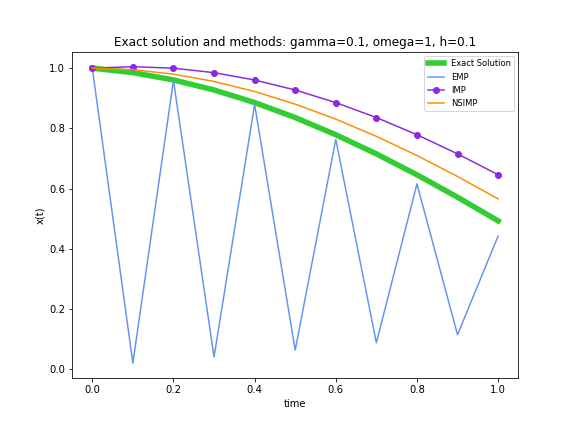
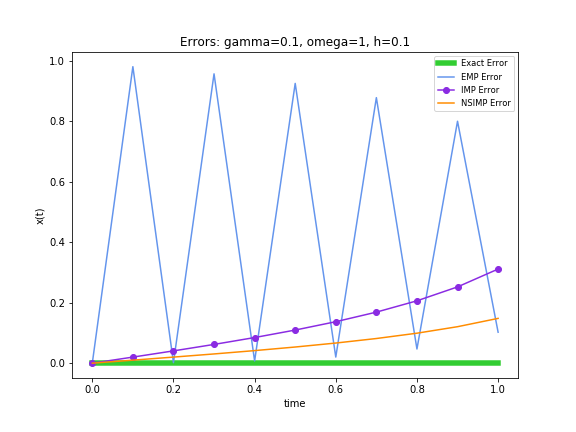

**Figure I**: Using our **Initial Values**, $\gamma = 0.1$, $\omega = 1$, $n=10$, and $x_0 = 1$.

| n    | EMP       | IMP       | NSIMP     | EMP Error  | IMP Error | NSIMP Error | Exact Solution |
|------|-----------|-----------|-----------|------------|-----------|-------------|----------------|
| 10   | 0\.442293 | 0\.645931 | 0\.565618 | 0\.102301  | 0\.311013 | 0\.148005   | 0\.492696      |
| 25   | 0\.120508 | 0\.645357 | 0\.56512  | 0\.755411  | 0\.309848 | 0\.146995   | 0\.492696      |
| 50   | 0\.513067 | 0\.645275 | 0\.565049 | 0\.0413464 | 0\.309682 | 0\.146851   | 0\.492696      |
| 100  | 0\.521725 | 0\.645255 | 0\.565031 | 0\.0589178 | 0\.30964  | 0\.146815   | 0\.492696      |
| 1000 | 0\.529489 | 0\.645248 | 0\.565025 | 0\.0746773 | 0\.309626 | 0\.146803   | 0\.492696      |

**Table I**: $\omega=1$, $\gamma=0.1$, and $x_0=1$.


We picked these initial values to have our code run during a time interval of 0 to 1. Based on the computations and errors in **Table I**, we see that **EMP** had a better estimation to the exact solution, but the error grew at different steps as the number of steps grew. 


In [ ]:
# Initial Values
steps = 10
x0 = 1
gamma = 0.1
omega = 1
main()
# ===========================

### Computational Cost
To start our analysis, we will first test how long each midpoint method takes to run.

| steps | gamma  | omega | EMP Time     | IMP Time    | NSIMP Time  |
|-------|--------|-------|--------------|-------------|-------------|
| 100   | 0\.001 | 1     | 0\.0001688   | 0\.00647235 | 0\.00880003 |
| 100   | 0\.001 | 2     | 0\.000169992 | 0\.00654292 | 0\.00910115 |
| 100   | 0\.001 | 5     | 0\.000268221 | 0\.00750303 | 0\.00908232 |
| 100   | 0\.001 | 10    | 0\.000164032 | 0\.00719905 | 0\.00906396 |
| 100   | 0\.01  | 1     | 0\.000162125 | 0\.00760794 | 0\.00897288 |
| 100   | 0\.01  | 2     | 0\.000169992 | 0\.00796008 | 0\.009547   |
| 100   | 0\.01  | 5     | 0\.000168085 | 0\.00713873 | 0\.01038    |
| 100   | 0\.01  | 10    | 0\.000163078 | 0\.007375   | 0\.011729   |
| 100   | 0\.1   | 1     | 0\.000313044 | 0\.0212178  | 0\.02367    |
| 100   | 0\.1   | 2     | 0\.000245094 | 0\.010334   | 0\.0118721  |
| 100   | 0\.1   | 5     | 0\.000182152 | 0\.012032   | 0\.011116   |
| 100   | 0\.1   | 10    | 0\.000169039 | 0\.00875211 | 0\.010772   |
| 100   | 1      | 1     | 0\.000183821 | 0\.00730515 | 0\.0102711  |
| 100   | 1      | 2     | 0\.000209093 | 0\.00798821 | 0\.0100441  |
| 100   | 1      | 5     | 0\.00016284  | 0\.00799727 | 0\.0113139  |
| 100   | 1      | 10    | 0\.000172853 | 0\.0078361  | 0\.0121689  |


We tested the runtimes of each midpoint method with 100 iterations each, and different values for $\gamma$ and $\omega$. Based on the table above, each method does not differ in terms of computational cost. The difference is small and negligible.


In [ ]:
s = [10, 25, 50, 100]
g = [10e-4, 10e-3, 10e-2, 10e-1]
o = [1, 2, 5, 10]
times = []

for steps in s:
    for gamma in g:
        for omega in o:
            temp = []
            temp.append(steps)
            temp.append(gamma)
            temp.append(omega)
            start = time.time()
            mid_point()
            temp.append(time.time() - start)
            start = time.time()
            implicit_mid_point()
            temp.append(time.time() - start)
            start = time.time()
            ns_implicit_mid()
            temp.append(time.time() - start)
            times.append(temp)
            
print(table(times, headers=["steps", "gamma", "omega", "EMP Time", "IMP Time", "NSIMP Time"]))

### Implicit methods when $\gamma = 0$
Given that when $\gamma = 0$, both implicit methods are equivalent, and we expect both implicit methods to be superior, compared to the explicit method. The following tables show computations when $\gamma = 0$, with various $\omega$, and $x_0$.

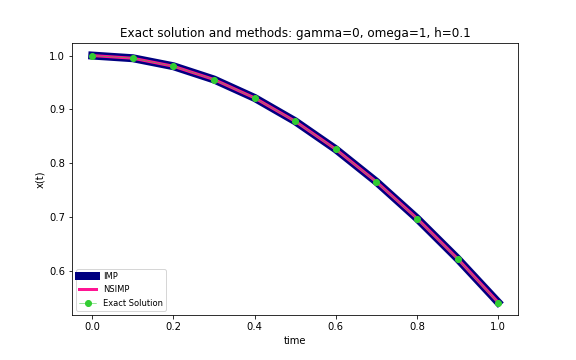

**Figure 1**: $\omega=1$, $\gamma=0$, $n=10$, and $x_0=1$.

| n    | EMP       | IMP       | NSIMP     | EMP Error   | IMP Error     | NSIMP Error   | Exact Solution |
|------|-----------|-----------|-----------|-------------|---------------|---------------|----------------|
| 10   | 0\.454231 | 0\.541002 | 0\.541002 | 0\.159302   | 0\.00129555   | 0\.00129555   | 0\.540302      |
| 100  | 0\.531873 | 0\.540309 | 0\.540309 | 0\.015601   | 1\.29782e\-05 | 1\.29782e\-05 | 0\.540302      |
| 1000 | 0\.539461 | 0\.540302 | 0\.540302 | 0\.00155767 | 1\.29784e\-07 | 1\.29784e\-07 | 0\.540302      |

**Table 1**: $\omega=1$, $\gamma=0$, and $x_0=1$.

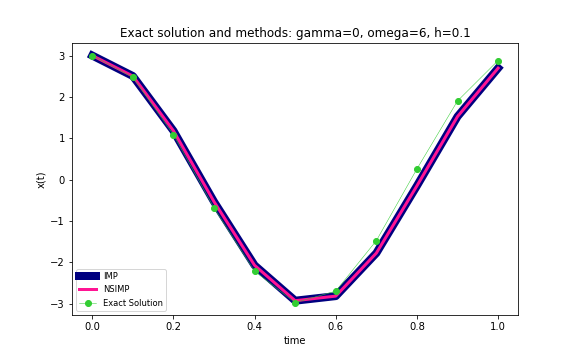

**Figure 2**: $\omega=6$, $\gamma=0$, $n=10$, and $x_0=3$.

| n    | EMP      | IMP      | NSIMP    | EMP Error   | IMP Error     | NSIMP Error   | Exact Solution |
|------|----------|----------|----------|-------------|---------------|---------------|----------------|
| 10   | 2\.62519 | 2\.69604 | 2\.69604 | 0\.088634   | 0\.0640427    | 0\.0640427    | 2\.88051       |
| 100  | 2\.93328 | 2\.879   | 2\.879   | 0\.0183179  | 0\.000525146  | 0\.000525146  | 2\.88051       |
| 1000 | 2\.88557 | 2\.8805  | 2\.8805  | 0\.00175633 | 5\.23825e\-06 | 5\.23825e\-06 | 2\.88051       |

**Table 2**: $\omega=6$, $\gamma=0$, and $x_0=3$.

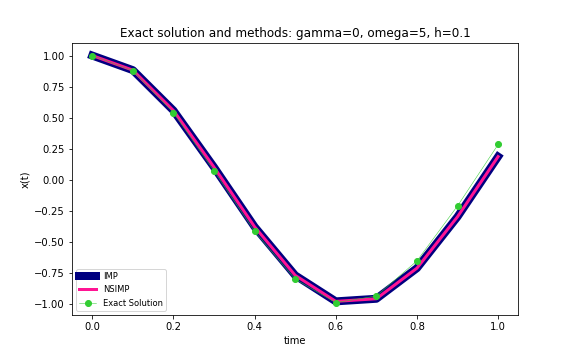

**Figure 3**: $\omega=5$, $\gamma=0$, $n=10$, and $x_0=1$.

| n    | EMP      | IMP      | NSIMP    | EMP Error   | IMP Error     | NSIMP Error   | Exact Solution |
|------|----------|----------|----------|-------------|---------------|---------------|----------------|
| 10   | 2\.62519 | 2\.69604 | 2\.69604 | 0\.0886364  | 0\.0640427    | 0\.0640427    | 2\.88051       |
| 100  | 2\.93328 | 2\.879   | 2\.879   | 0\.0183179  | 0\.000525146  | 0\.000525146  | 2\.88051       |
| 1000 | 2\.88557 | 2\.8805  | 2\.8805  | 0\.00175633 | 5\.23825e\-06 | 5\.23825e\-06 | 2\.88051       |


**Table 3**: $\omega=5$, $\gamma=0$, and $x_0=1$.

In [ ]:
steps = 10
x0 = 1
gamma = 0
omega = 1
main()

steps = 10
x0 = 1
gamma = 0
omega = 5
main()

steps = 10
x0 = 3
gamma = 0
omega = 6
main()

Above we tested $\gamma = 0$ with 3 different number of iterations, 10, 100, 1000. According to figure and **Table 1**, when $\gamma = 0$ and $\omega = 1$, both implicit midpoint methods are equivalent and equivalent to the exact solution curve. But for **Figures** and **Tables 2, and 3**, when we have different values for $\omega$ and $x_0$, we simply deduce that both implicit methods are equivalent but not equivalent to the exact solution curve. But as we test different values of $\gamma$ and $\omega$, both implicit methods would always have a better approximation to the exact solution curve. The explicit method would compute bigger errors and have the furthest approximation to the exact solution curve.

### Experimenting on long-time accuracy of the methods for small values of $\gamma > 0$

#### Decreasing the value of $\gamma$: 

The following two plots and tables illustrate the changes in solutions as $\gamma$ decreases from $\gamma = 1e-5$ to $\gamma = 1e-14$.

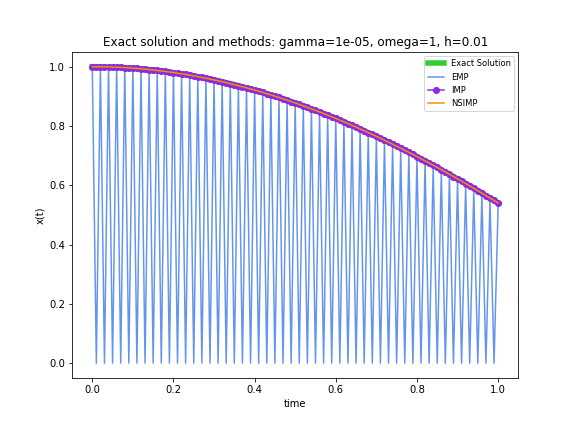
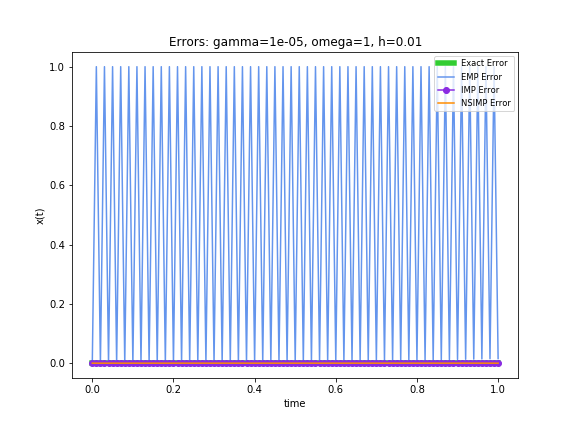

**Figure 4**: $\gamma=1e-5$, $\omega = 1$, $n=100$, and $x_0=1$.

| n    | EMP       | IMP       | NSIMP     | EMP Error   | IMP Error     | NSIMP Error   | Exact Solution |
|------|-----------|-----------|-----------|-------------|---------------|---------------|----------------|
| 10   | 0\.454231 | 0\.541014 | 0\.541005 | 0\.159294   | 0\.00132671   | 0\.00131112   | 0\.540297      |
| 100  | 0\.531873 | 0\.540321 | 0\.540312 | 0\.0155911  | 4\.41264e\-05 | 2\.85521e\-05 | 0\.540297      |
| 1000 | 0\.539461 | 0\.540314 | 0\.540305 | 0\.00154768 | 3\.12779e\-05 | 1\.57038e\-05 | 0\.540297      |

**Table 4**: $\gamma=1e-5$, $\omega = 1$, and $x_0=1$.

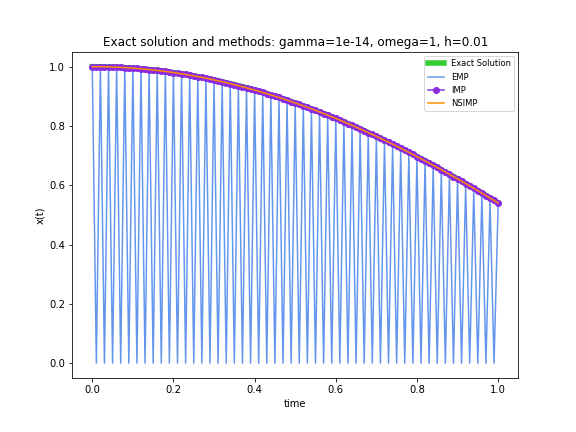
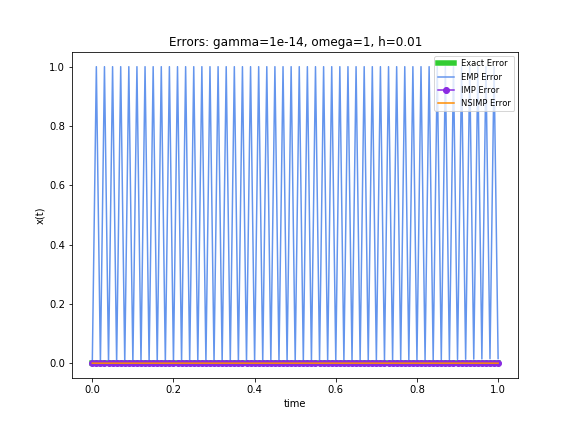

**Figure 5**: $\gamma=1e-14$, $\omega = 1$, $n=100$, and $x_0=1$.

| n    | EMP       | IMP       | NSIMP     | EMP Error   | IMP Error     | NSIMP Error   | Exact Solution |
|------|-----------|-----------|-----------|-------------|---------------|---------------|----------------|
| 10   | 0\.454231 | 0\.541002 | 0\.541002 | 0\.159302   | 0\.00129555   | 0\.00129555   | 0\.540302      |
| 100  | 0\.531873 | 0\.540309 | 0\.540309 | 0\.015601   | 1\.29782e\-05 | 1\.29782e\-05 | 0\.540302      |
| 1000 | 0\.539461 | 0\.540302 | 0\.540302 | 0\.00155767 | 1\.29784e\-07 | 1\.29784e\-07 | 0\.540302      |


**Table 5**: $\gamma=1e-14$, $\omega = 1$, and $x_0=1$.

Looking at **Figure 4** and **Figure 5** there does not seem to be much of a difference as $\gamma$ decreases, but from **Table 4** and **Table 5**, we find that decreasing $\gamma$ slightly increases the error for EMP, while the errors for IMP and NSIMP have a slight decrease in error. For instance, at 1000 steps, EMP error increases by `0.00000999` while IMP error decreases by `0.000031148116` and the NSIMP error decreases by `0.000015574016`. From these tables we can conclude that as $\gamma$ decreases, the errors for IMP and NSMIP become more like each other and become significantly smaller than the EMP error.

Due to the limitations of the Python data types we are using, during testing, we found that when $\gamma \leq 1e-13$ we obtain the same solutions, and hence error values, for IMP and NSIMP.


In [ ]:
steps = 100
x0 = 1
gamma = 1e-14
omega = 1
main()

In [ ]:
steps = 100
x0 = 1
gamma = 1e-5
omega = 1
main()

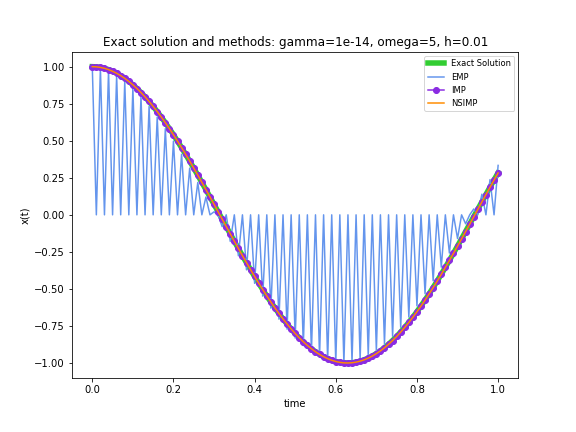
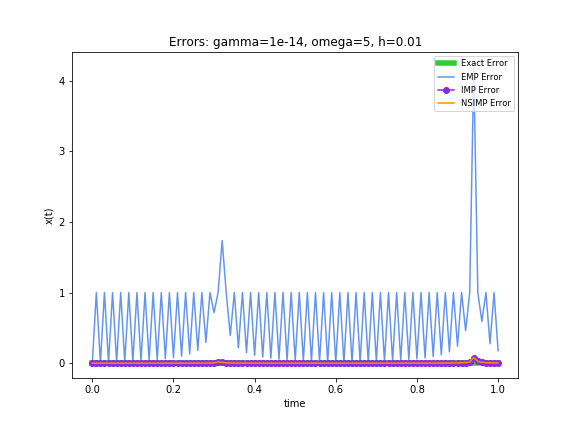

**Figure 6**: $\gamma=1e-14$, $\omega=5$, $n=100$, and $x_0 = 1$.

| n    | EMP       | IMP       | NSIMP     | EMP Error  | IMP Error     | NSIMP Error   | Exact Solution |
|------|-----------|-----------|-----------|------------|---------------|---------------|----------------|
| 10   | 1         | 0\.186093 | 0\.186093 | 2\.52532   | 0\.343962     | 0\.343962     | 0\.283662      |
| 100  | 0\.333638 | 0\.282664 | 0\.282664 | 0\.176181  | 0\.00352059   | 0\.00352059   | 0\.283662      |
| 1000 | 0\.288477 | 0\.283652 | 0\.283652 | 0\.0169731 | 3\.52136e\-05 | 3\.52136e\-05 | 0\.283662      |

**Table 6**: $\gamma=1e-14$, $\omega=5$, and $x_0 = 1$.

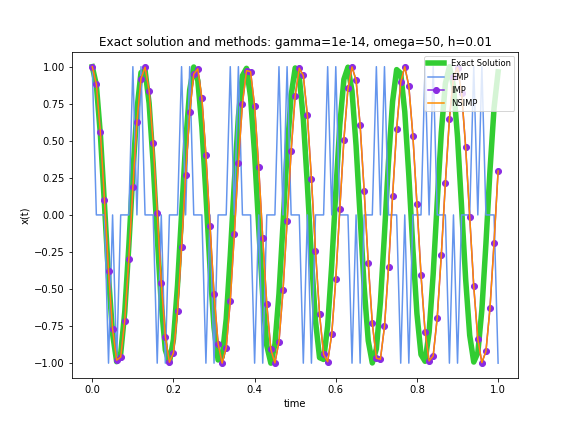
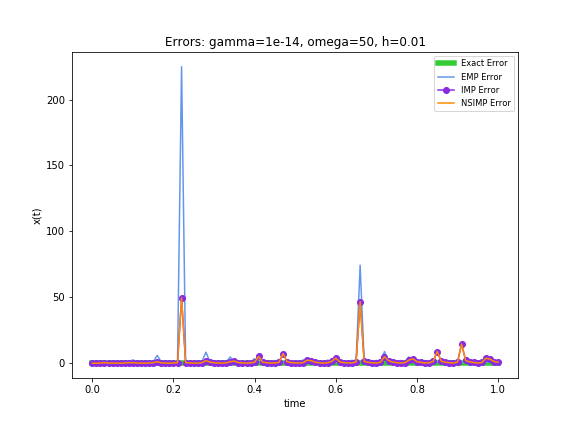

**Figure 7**: $\gamma=1e-14$, $\omega=50$, $n=100$, and $x_0 = 1$.

| n    | EMP             | IMP       | NSIMP     | EMP Error     | IMP Error  | NSIMP Error | Exact Solution |
|------|-----------------|-----------|-----------|---------------|------------|-------------|----------------|
| 10   | \-9\.12765e\+09 | 0\.241444 | 0\.241444 | 9\.45904e\+09 | 0\.74979   | 0\.74979    | 0\.964966      |
| 100  | \-1             | 0\.29652  | 0\.29652  | 2\.03631      | 0\.692715  | 0\.692715   | 0\.964966      |
| 1000 | 0\.982353       | 0\.962182 | 0\.962182 | 0\.0180181    | 0\.0028854 | 0\.0028854  | 0\.964966      |

**Table 7**: $\gamma=1e-14$, $\omega=50$, and $x_0 = 1$.

As $\omega$ increases, the solution to the initial value problem begins to oscillate more frequently. This creates an issue with the midpoint method approximated solutions since they have a hard time keeping up with the exact solution. The EMP naturally oscillated already but introducing oscillation in the exact solution created the non-simple oscillation illustrated in Figure 7 above. We can also see that the IMP and NSIMP have a slightly longer period than the exact solution, which causes them to get ahead of the exact values as time increases. Comparing **Table 5** with **Table 6** and **Table 7**, we observe that when increasing the value of $\omega$, all three of the midpoint methods errors increase. For instance, from $\omega = 5$ to $\omega = 50$ the EMP error at $n = 1000$ increases by `0.001045` while the IMP and NSIMP, which as mentioned above have the same error, increase by `0.0028501864`. Therefore, we can conclude that as $\omega$ increases the midpoint methods become less accurate.

In [ ]:
steps = 100
x0 = 1
gamma = 1e-14
omega = 5
main()

steps = 100
x0 = 1
gamma = 1e-14
omega = 50
main()

#### Increasing the value of $\gamma$: 

Using our **Initial Values** demonstrated in **Figure I** and **Table I**, as well as the following two plots and tables, we illustrate the changes in solutions as $\gamma$ increases from $\gamma=0.1$, to $\gamma = 0.5$, to $\gamma = 0.9$.

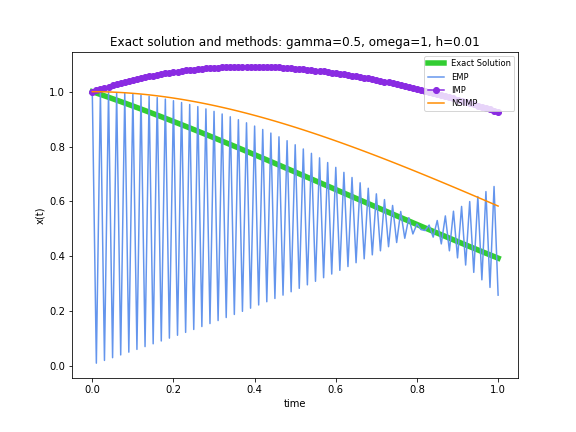
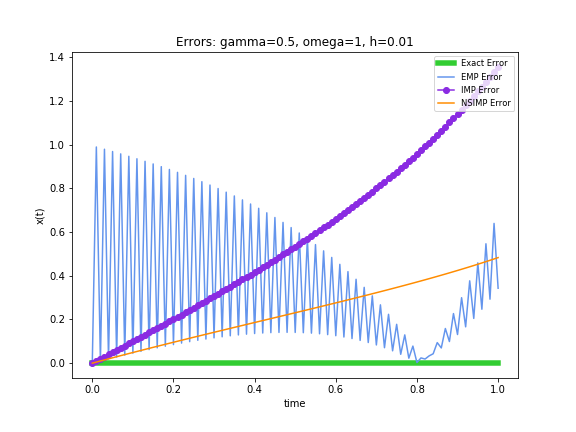

**Figure 8**: $\gamma=0.5$, $\omega=1$, $n=100$, and $x_0 = 1$.

| n    | EMP       | IMP       | NSIMP     | EMP Error | IMP Error | NSIMP Error | Exact Solution |
|------|-----------|-----------|-----------|-----------|-----------|-------------|----------------|
| 10   | 0\.129757 | 0\.927226 | 0\.583187 | 0\.669783 | 1\.35967  | 0\.484138   | 0\.392947      |
| 100  | 0\.258087 | 0\.926461 | 0\.582902 | 0\.3432   | 1\.35773  | 0\.483412   | 0\.392947      |
| 1000 | 0\.270776 | 0\.926454 | 0\.582899 | 0\.310908 | 1\.35771  | 0\.483405   | 0\.392947      |


**Table 8**: $\gamma=0.5$, $\omega=1$, and $x_0 = 1$.

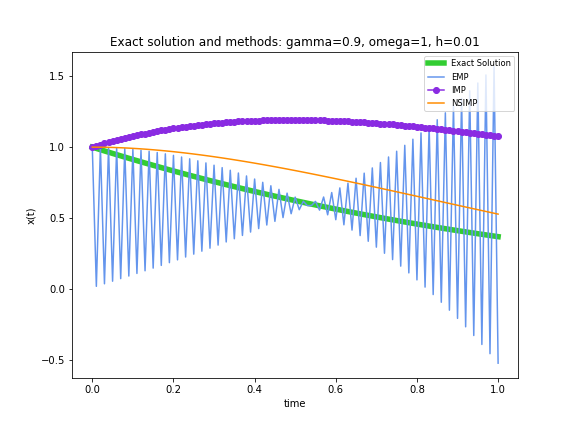
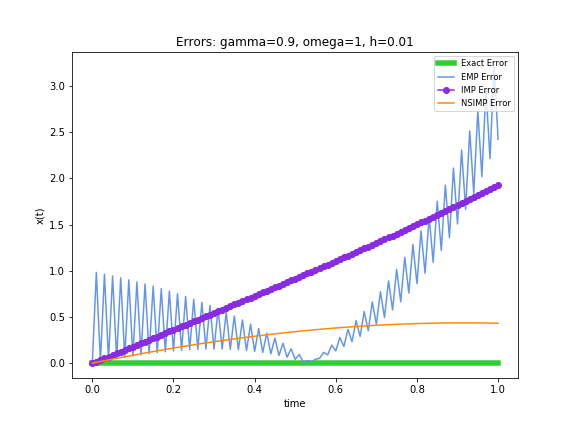

**Figure 9**: $\gamma=0.9$, $\omega=1$, $n=100$, and $x_0 = 1$.

| n    | EMP         | IMP      | NSIMP     | EMP Error | IMP Error | NSIMP Error | Exact Solution |
|------|-------------|----------|-----------|-----------|-----------|-------------|----------------|
| 10   | \-0\.814656 | 1\.07833 | 0\.527695 | 3\.21042  | 1\.92585  | 0\.431802   | 0\.368553      |
| 100  | \-0\.524106 | 1\.07743 | 0\.527577 | 2\.42206  | 1\.92341  | 0\.43148    | 0\.368553      |
| 1000 | \-0\.494036 | 1\.07742 | 0\.527575 | 2\.34047  | 1\.92339  | 0\.431477   | 0\.368553      |


**Table 9**: $\gamma=0.9$, $\omega=1$, and $x_0 = 1$.

**Figure 8** and **Figure 9** show an interesting finding about the explicit method as $\gamma$ increases towards $\omega$. In **Figure 8**, when $\gamma = 0.5$ and $\omega = 1$, the EMP solution converges almost at the exact solution at some point in time and then begins to diverge. **Figure 9** shows how, as $\gamma$ increases to 0.9, the EMP solution converges earlier in the graph and diverges afterwards with an increasing amplitude that seems to have a faster rate than the rate at which it converged earlier. Comparing these two graphs we can see that in the EMP method converges and then diverges earlier in time as $\gamma$ increases towards the value of $\omega$.

From **Table 8 and 9**, we get that as $\gamma$ increases towards $\omega$, the error for the EMP becomes distinctly larger while the error for IMP becomes only a little larger. And the error for NSIMP becomes a bit lower. **Figure 6** shows that the approximated solution for the initial value problem with $\gamma$ = 0.9, $\omega$ = 1 using n = 10, 100, and 1000, using EMP, is negative. This is due to the oscillation of the explicit method, which as stated before, the method diverges faster than it converged at some point on the graph depending on the variables used. Thus, we conclude that as $\gamma$ increases towards $\omega$, the EMP becomes considerably less accurate, IMP becomes slightly less accurate, and NSIMP becomes slightly more accurate.


In [ ]:
steps = 100
x0 = 1
gamma = 0.5
omega = 1
main()

steps = 100
x0 = 1
gamma = 0.9
omega = 1
main()

### Breaking point for all methods
The breaking points for each method depended on $\omega$. They occurred when $\gamma \gt \omega$ and this is not possible by definition. In addition, whenever $\gamma = \omega$, we had extreme errors for each method. 

#### EMP breaking points:

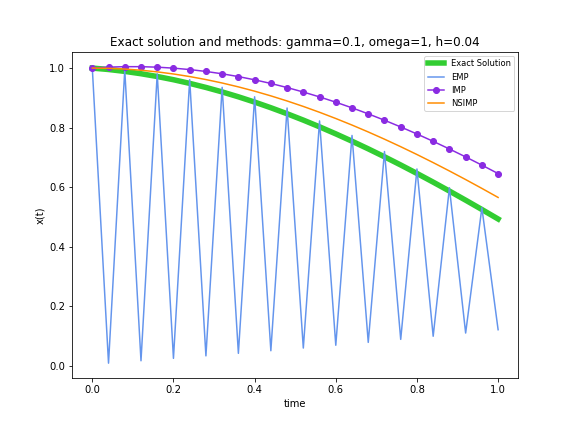
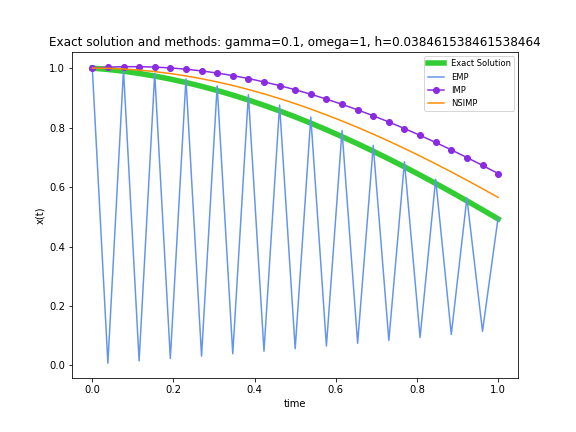

**Figure 10**: $\gamma=0.1$, $\omega=1$, and $x_0=1$. Left: $n=25$. Right: $n=26$.

In **Figure 10**, we have found the most breaking points was for the explicit midpoint method. For an odd number of steps, the nature of the explicit method is oscillation. Due to this nature, the computed errors would become extreme. These extreme errors would also apply for an even number of steps.

In [ ]:
## ODD
steps = 25
x0 = 1
gamma = 0.1
omega = 1
main()

In [ ]:
## EVEN
steps = 26
x0 = 1
gamma = 0.1
omega = 1
main()

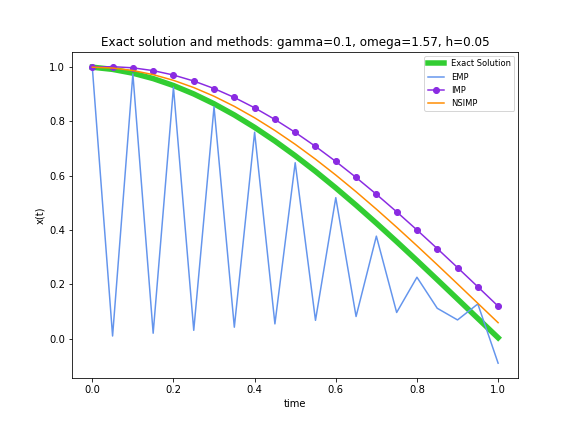
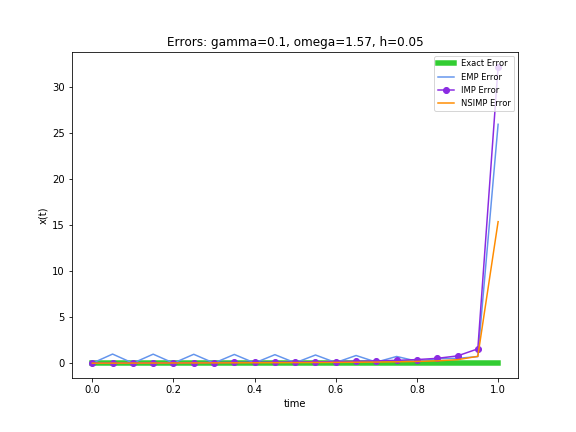

**Figure 11**: $\gamma = 0.1$, $\omega = \frac{\pi}{2}$, $n=20$ and $x_0=1$.

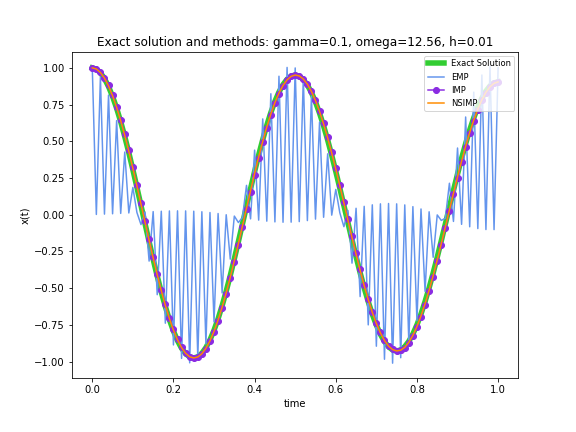
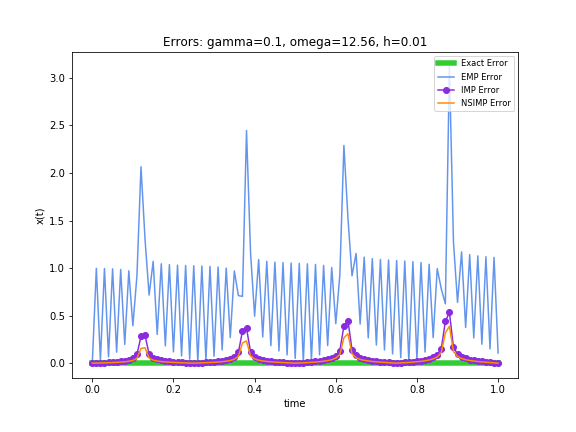

**Figure 12**: $\gamma = 0.1$, $\omega = 4\pi$, $n=20$ and $x_0=1$.

When using any $\gamma > 0$, the error diverges $\frac{n\pi}{2} < t\beta < n\pi$ and converges $n\pi < t\beta < \frac{(n+1)\pi}{2}$. At every point it starts to diverge the rate at which it diverges increases.

In [ ]:
steps = 20
x0 = 1
gamma = 0.1
omega = 3.14/2
main()

In [ ]:
# Error diverging and converging
steps = 100
x0 = 1
gamma = 0.1
omega = 12.56
main()

## Conclusion
To summarize, we were given an initial value problem to approximate the exact solution curve. We used Euler’s method and implemented three different midpoint methods to increase accuracy in our approximations. We have found that each method had a negligible run time difference in terms of computational costs.

During our analysis, we deduced that both the implicit methods were superior compared with the explicit method. When $\gamma = 0$, both implicit methods were equivalent, while the explicit method had extreme errors. We also tested when $\gamma > 0$. When using any $\gamma > 0$, the error diverges $\frac{n\pi}{2}<\omega<n\pi$ and converges $n\pi < \omega < \frac{(n+1)\pi}{2}$. At every point it starts to diverge and the rate at which it diverges increases. We increased values of $\omega$ and increased $\gamma$ towards $\omega$. For increased values of $\omega$, we deduced that all midpoint methods were less accurate. On the other hand, when we increased $\gamma$ towards $\omega$, our midpoint methods were becoming more accurate, noting that the explicit method was less accurate out of the three. And lastly, the breaking points for all three midpoint methods depended on $\omega$. 

Therefore, approximating the initial value problem with the explicit method resulted in worst performance. The **Implicit Midpoint** method was an improvement for the **Explicit Midpoint** method but overall, the **Non-Standard Implicit Midpoint** method had the best performance and approximation to the exact solution curve.
 
